<a href="https://colab.research.google.com/github/Ashishkr108/Learning-Path/blob/main/Stock_price_prediction_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow import keras


In [3]:
#import dataset
df = pd.read_csv('drive/MyDrive/zummit/apple_share_price.csv', usecols=[1,2,3,4])

In [4]:
df.head()

,Open,High,Low,Close
0,156.60,158.57,156.07,157.48
1,159.90,160.00,154.63,155.32
2,159.26,161.27,159.11,161.06
3,158.60,161.83,158.27,160.08
4,157.06,158.92,156.67,158.81


In [5]:
df.tail()

,Open,High,Low,Close
1659,47.71,48.05,47.41,48.02
1660,47.82,47.89,47.56,47.68
1661,47.08,47.76,47.07,47.71
1662,47.49,47.50,46.88,47.33
1663,46.52,47.18,46.41,47.08


In [10]:
df = df.reindex(index = df.index[::-1])

In [11]:
df.head()

,Open,High,Low,Close
1663,46.52,47.18,46.41,47.08
1662,47.49,47.50,46.88,47.33
1661,47.08,47.76,47.07,47.71
1660,47.82,47.89,47.56,47.68
1659,47.71,48.05,47.41,48.02


In [7]:
s[::-1]

'dlrow olleh'

In [9]:
df.index[::-1]

RangeIndex(start=1663, stop=-1, step=-1)

In [12]:
# CREATING OWN INDEX FOR FLEXIBILITY
obs = np.arange(1, len(dataset) + 1, 1)

In [13]:
obs

array([   1,    2,    3, ..., 1662, 1663, 1664])

In [5]:
dataset.head()

,Open,High,Low,Close
1663,46.52,47.18,46.41,47.08
1662,47.49,47.50,46.88,47.33
1661,47.08,47.76,47.07,47.71
1660,47.82,47.89,47.56,47.68
1659,47.71,48.05,47.41,48.02


In [39]:
# TAKING DIFFERENT INDICATORS FOR PREDICTION
OHLC_avg = df.mean(axis = 1)
HLC_avg = df[['High', 'Low', 'Close']].mean(axis = 1)
close_val = df[['Close']]

In [20]:
type(OHLC_avg[:5])

pandas.core.series.Series

In [25]:
OHLC_avg[:5]

1663    46.7975
1662    47.3000
1661    47.4050
1660    47.7375
1659    47.7975
dtype: float64

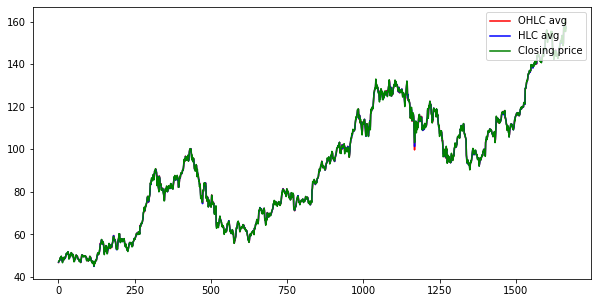

In [34]:
# PLOTTING ALL INDICATORS IN ONE PLOT
plt.figure(figsize=(10,5)) 
plt.plot(obs, OHLC_avg, 'r', label = 'OHLC avg')
plt.plot(obs, HLC_avg, 'b', label = 'HLC avg')
plt.plot(obs, close_val, 'g', label = 'Closing price')
plt.legend(loc = 'upper right')
plt.show()

In [40]:
# PREPARATION OF TIME SERIES DATASE
OHLC_avg = np.reshape(OHLC_avg.values, (len(OHLC_avg),1)) # 1664
scaler = MinMaxScaler(feature_range=(0, 1))
OHLC_avg = scaler.fit_transform(OHLC_avg)


In [35]:
OHLC_avg.values

array([ 46.7975,  47.3   ,  47.405 , ..., 160.175 , 157.4625, 157.18  ])

In [41]:
#train test split
train_OHLC = int(len(OHLC_avg) * 0.75)
test_OHLC = len(OHLC_avg) - train_OHLC
train_OHLC, test_OHLC = OHLC_avg[0:train_OHLC,:], OHLC_avg[train_OHLC:len(OHLC_avg),:]

In [47]:
train_OHLC

array([[0.01530745],
       [0.0196717 ],
       [0.02058364],
       ...,
       [0.57970731],
       [0.57634184],
       [0.57117422]])

In [43]:
#preprocessing
# FUNCTION TO CREATE 1D DATA INTO TIME SERIES DATASET
def new_dataset(dataset, step_size):
	data_X, data_Y = [], []
	for i in range(len(dataset)-step_size-1):
		a = dataset[i:(i+step_size), 0]
		data_X.append(a)
		data_Y.append(dataset[i + step_size, 0])
	return np.array(data_X), np.array(data_Y)

In [45]:
# TIME-SERIES DATASET (FOR TIME T, VALUES FOR TIME T+1)
trainX, trainY = new_dataset(train_OHLC, 1)
testX, testY = new_dataset(test_OHLC, 1)

In [48]:
trainX

array([[0.01530745],
       [0.0196717 ],
       [0.02058364],
       ...,
       [0.61776967],
       [0.60029095],
       [0.57970731]])

In [53]:
# LSTM MODEL
step_size  = 1
model = keras.models.Sequential([
  keras.layers.LSTM(32, input_shape=(1, step_size), return_sequences = True),
  keras.layers.LSTM(16),
  keras.layers.Dense(1),
  keras.layers.Activation('linear'),
])

In [54]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 1, 32)             4352      
                                                                 
 lstm_3 (LSTM)               (None, 16)                3136      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 7,505
Trainable params: 7,505
Non-trainable params: 0
_________________________________________________________________


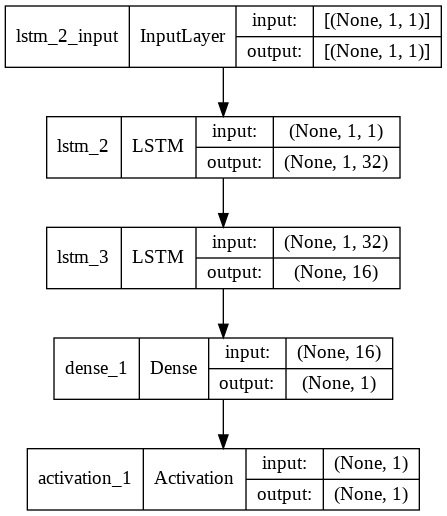

In [56]:
keras.utils.plot_model(model, "boston_housing_model.png", show_shapes=True)

In [57]:
# MODEL COMPILING AND TRAINING
model.compile(loss='mean_squared_error', optimizer='adagrad') # Try SGD, adam, adagrad and compare!!!
model.fit(trainX, trainY, epochs=5, batch_size=1, verbose=2)

Epoch 1/5
1246/1246 - 6s - loss: 0.1062 - 6s/epoch - 5ms/step
Epoch 2/5
1246/1246 - 2s - loss: 0.0732 - 2s/epoch - 2ms/step
Epoch 3/5
1246/1246 - 2s - loss: 0.0595 - 2s/epoch - 2ms/step
Epoch 4/5
1246/1246 - 2s - loss: 0.0521 - 2s/epoch - 2ms/step
Epoch 5/5
1246/1246 - 2s - loss: 0.0478 - 2s/epoch - 2ms/step


In [58]:
# PREDICTION
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [59]:
# DE-NORMALIZING FOR PLOTTING
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [64]:
# TRAINING RMSE
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train RMSE: %.2f' % (trainScore))

Train RMSE: 24.75


In [65]:
# TEST RMSE
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test RMSE: %.2f' % (testScore))

Test RMSE: 45.46


In [66]:
# CREATING SIMILAR DATASET TO PLOT TRAINING PREDICTIONS
trainPredictPlot = np.empty_like(OHLC_avg)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[step_size:len(trainPredict)+step_size, :] = trainPredict

In [67]:
# CREATING SIMILAR DATASSET TO PLOT TEST PREDICTIONS
testPredictPlot = np.empty_like(OHLC_avg)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(step_size*2)+1:len(OHLC_avg)-1, :] = testPredict

In [68]:
# DE-NORMALIZING MAIN DATASET 
OHLC_avg = scaler.inverse_transform(OHLC_avg)

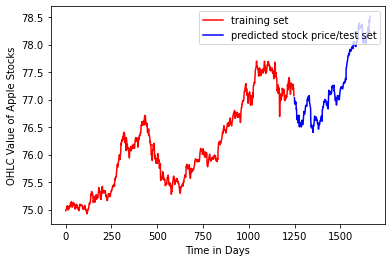

In [71]:
# PLOT OF MAIN OHLC VALUES, TRAIN PREDICTIONS AND TEST PREDICTIONS
#plt.plot(OHLC_avg, 'g', label = 'original dataset')
plt.plot(trainPredictPlot, 'r', label = 'training set')
plt.plot(testPredictPlot, 'b', label = 'predicted stock price/test set')
plt.legend(loc = 'upper right')
plt.xlabel('Time in Days')
plt.ylabel('OHLC Value of Apple Stocks')
plt.show()

In [72]:
# PREDICT FUTURE VALUES
last_val = testPredict[-1]
last_val_scaled = last_val/last_val
next_val = model.predict(np.reshape(last_val_scaled, (1,1,1)))
print ("Last Day Value:", np.asscalar(last_val))
print "Next Day Value:", np.asscalar(last_val*next_val)
# print np.append(last_val, next_val)

SyntaxError: ignored